<a href="https://colab.research.google.com/github/NguyenThiHongLinh/ML2023/blob/main/Lab_5_20130306_NguyenThiHongLinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 17/03/2023**



# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'



Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


#Task 1. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply SVM algorithm to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (Logistic Regression, Decision Tree, kNN) based on metrics: accuracy, precision, recall, f1 measures.



In [2]:
#1.1
from sklearn import datasets
cancer = datasets.load_breast_cancer()
cancer
x=cancer.data
y=cancer.target
x
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



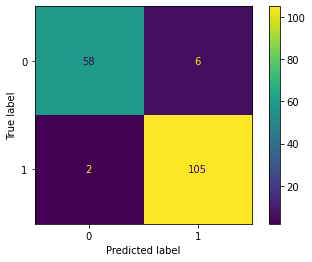

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=4, stratify=y)
x_test
y_train
y_test
clf=svm.SVC(kernel="linear")
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [5]:
#1.2
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [6]:
y_predict=classifier.predict(x_test)
y_predict
cm = confusion_matrix(y_test, y_predict) 
cm

array([[ 63,   7],
       [  2, 116]])

Accuracy :  0.9521276595744681


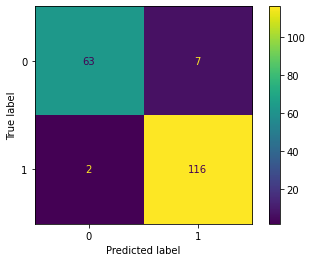

In [7]:
print ("Accuracy : ", accuracy_score(y_test, y_predict))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

#Task 2. 

*   1.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   1.2.	Compare the obtained results in 1.1 with SVM using other kernels (**Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: accuracy, precision, recall, f1 measures





              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



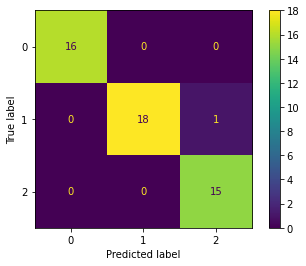

In [9]:
#2.1
data1=datasets.load_iris()
X=data1.data
Y=data1.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.33, random_state=0)
clf=svm.SVC(kernel="linear")
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        19
           2       0.30      1.00      0.46        15

    accuracy                           0.30        50
   macro avg       0.10      0.33      0.15        50
weighted avg       0.09      0.30      0.14        50



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


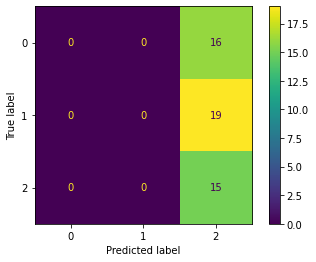

In [10]:
#2.2
clf2=svm.SVC(kernel="sigmoid")
clf2.fit(X_train,Y_train)
Y_pred2=clf2.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred2))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



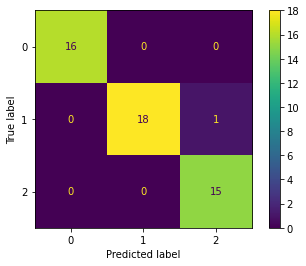

In [11]:
clf3=svm.SVC(kernel="poly")
clf3.fit(X_train,Y_train)
Y_pred3=clf3.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred3))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred3)

#Task 3. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with mnist dataset based on accuracy, precision, recall, f1 measures.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.9478114478114478


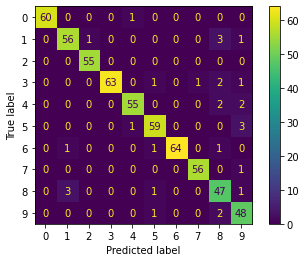

In [12]:
mnist=datasets.load_digits()
X1=mnist.data
Y1=mnist.target
X1
Y1
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1, Y1,test_size=0.33, random_state=2)
classifier = LogisticRegression(random_state = 4) 
classifier.fit(X1_train, Y1_train) 
Y1_predict=classifier.predict(X1_test)
Y1_predict
CM = confusion_matrix(Y1_test, Y1_predict) 
CM
print ("Accuracy : ", accuracy_score(Y1_test, Y1_predict))
ConfusionMatrixDisplay.from_predictions(Y1_test, Y1_predict)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.95      1.00      0.98        61
           2       1.00      1.00      1.00        55
           3       1.00      0.96      0.98        68
           4       0.98      0.95      0.97        59
           5       0.97      0.97      0.97        63
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        57
           8       0.89      0.92      0.91        52
           9       0.94      0.94      0.94        51

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



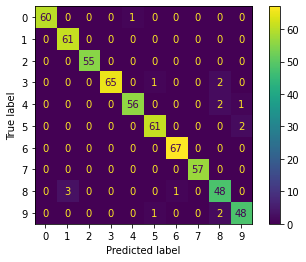

In [13]:
clfs=svm.SVC(kernel="poly")
clfs.fit(X1_train,Y1_train)
Y_pre=clfs.predict(X1_test)
print(metrics.classification_report(Y1_test,Y_pre))
ConfusionMatrixDisplay.from_predictions(Y1_test, Y_pre)

#Task 4. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with **credit card dataset** based on accuracy, precision, recall, f1 measures.

*   Give some comments on the obtained results
*   Identify issues with dataset, and propose the solutions to these issues



In [14]:
dt=pd.read_csv("creditcard.csv")
dt
test= pd.DataFrame(dt, columns=['V18','V19','V20','V21','V22','V23'])
#test.describe()
df=test.sample(20)
df

,V18,V19,V20,V21,V22,V23
279323,0.755671,-0.517909,0.072609,0.051583,0.451898,-0.278956
239433,0.573261,-0.431292,-0.249452,0.188213,0.692496,-0.010711
162963,0.937532,0.385610,-0.226913,0.174378,0.660888,0.112385
161017,0.021703,0.083790,-0.426224,1.554027,-0.233473,0.384441
271191,0.660687,0.118562,-0.218558,0.211005,0.490891,-0.030496
254601,1.986493,-0.079807,0.440009,0.123863,-0.206228,-0.375536
283934,0.944047,0.142422,-0.062363,2.968731,0.389724,0.716219
250437,-0.693649,-0.277605,-0.206915,0.044688,0.222919,0.026728
191588,-0.674157,-0.583354,1.880262,-4.018210,0.670335,0.745879
277482,-0.618199,-0.193526,-0.325967,0.038743,0.351324,-0.001787


#Finally,
Save a copy in your Github. Remember renaming the notebook.